In [ ]:
import os

#path to images folder
folder_path =  '...' 
file_list = os.listdir(folder_path)
images=[]

for file in file_list :
  if file[5]=='0':
    name=file[:12]
  else:
    name=file[:11]
  images.append(name)

print(images)


In [2]:
import tifffile as tf
import numpy as np
import os

In [ ]:
cate1=[]
cate2=[]
cate3=[]
cate4=[]
cate5=[]
cate6=[]
cate7=[]
cate8=[]
cate9=[]
cate10=[]

for name in images:
  if name[4]=='1' and name[5]!='0':
    cate1.append(name)
  if name[4]=='2':
    cate2.append(name)
  if name[4]=='3':
    cate3.append(name)
  if name[4]=='4':
    cate4.append(name)
  if name[4]=='5':
    cate5.append(name)
  if name[4]=='6':
    cate6.append(name)
  if name[4]=='7':
    cate7.append(name)
  if name[4]=='8':
    cate8.append(name)
  if name[4]=='9':
    cate9.append(name)
  if name[5]=='0' and name[4]=='1':
    cate10.append(name)

cate1

In [105]:
#path to category export(labels) folder 
input_folder = '...'
folder=os.listdir(input_folder)
folder.sort()

In [ ]:
%cd .... #path to label generation folder
from PIL import Image

channels= ['11','12','13','14','15','16','17','18','21','22','23','24','25','26','27','28','31','32','33','34','35','36','37','38','41','42','43','44','45','46','47','48']

#change the category according to the category you want to generate labels for....
for name in cate1:
  image_data = np.zeros((32, 512, 512), dtype=np.uint8)
  for i in range(32):
    count=0
    for file in folder :
      if file[:12]==name and file[13:15]==channels[i-1]:
        file_path = os.path.join(input_folder, file)
        image_file = Image.open(file_path)
        image=np.array(image_file)
        positive_mask= image > 0
        image[positive_mask]=1
        count=1
    if count==0:
      image=np.zeros((1,512,512),dtype=np.uint8)
    image_data[i-1]=image
  channel=np.zeros((1,512,512))
  image_data = np.concatenate((image_data,channel),axis=0)
  output_file=name+'.tiff'
  tf.imsave(output_file, image_data, metadata={'axes': 'CZYX'})


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

#path to generated label of your choice 
with tf.TiffFile('...') as tiff: 
    pages = tiff.pages
    combined_image = np.zeros((1, 512, 512), dtype=np.uint8)


    for i, page in enumerate(pages):
        image = page.asarray()
        combined_image += image

plt.imshow(combined_image[0], cmap='jet_r')
plt.axis('off')
plt.show()


In [ ]:
 #path to generated labels folder
input_folder = '...' 
folder=os.listdir(input_folder)
folder.sort()
paths=[]
names=[]
for file in folder:
  names.append(file)
  file_path = os.path.join(input_folder, file)
  paths.append(file_path)



 Run the below cell for generating RGB images of the generated labels

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf
from matplotlib.colors import ListedColormap
import imageio
#path to folder to save the generated rgb images
!mkdir ... 
%cd ... 


for path, name in zip(paths, names):
    with tf.TiffFile(path) as tiff:
        pages = tiff.pages

        colormap = ListedColormap(['#000000'] * len(pages))

        combined_image = np.zeros((512, 512, 3), dtype=np.uint16)

        for i, page in enumerate(pages):
            image = page.asarray()

            if i == 0 or i == 1 or i == 8 or i == 9 or i == 16 or i == 17 or i == 24 or i == 25:
                colormap.colors[i] = '#2828a2'
            elif i == 2 or i == 10 or i == 18 or i == 26:
                colormap.colors[i] = '#09c5c5'
            elif i == 3 or i == 4 or i == 11 or i == 12 or i == 19 or i == 20 or i == 27 or i == 28:
                colormap.colors[i] = '#1caf1c'
            elif i == 5 or i == 6 or i == 7:
                colormap.colors[i] = '#eeee25'
            elif i == 13 or i == 14 or i == 15:
                colormap.colors[i] = '#eeee25'
            elif i == 21 or i == 22 or i == 23:
                colormap.colors[i] = '#eeee25'
            elif i == 29 or i == 30 or i == 31:
                colormap.colors[i] = '#eeee25'

            hex_color = colormap.colors[i]
            rgb_color = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=np.uint16)

            mask = np.where(image > 0, 1, 0)

            rgb_color_tiled = np.tile(rgb_color, (512, 512, 1))

            colored_image = mask[:, :, np.newaxis] * rgb_color_tiled

            combined_image = combined_image + colored_image

    combined_image = combined_image.astype(np.uint8)
    output_name = name[:11] + '.jpg'
    imageio.imwrite(output_name, combined_image)


## Data Visualisation

In [4]:
import os

#path to generated labels folder of all categories
input_folder = '...' 
folder=os.listdir(input_folder)
folder.sort()
paths=[]
names=[]
for file in folder:
  names.append(file)
  file_path = os.path.join(input_folder, file)
  paths.append(file_path)

In [5]:
count=[0]*32



for path, name in zip(paths, names):
    with tf.TiffFile(path) as tiff:
        pages = tiff.pages

        for i, page in enumerate(pages):
            image = page.asarray()

            if i == 0 and np.any(image>0):
                count[0]+=1
            elif i == 1 and np.any(image>0):
                count[1]+=1
            elif i == 2 and np.any(image>0):
                count[2]+=1
            elif i == 3 and np.any(image>0):
                count[3]+=1
            elif i == 4 and np.any(image>0):
                count[4]+=1
            elif i == 5 and np.any(image>0):
                count[5]+=1
            elif i == 6 and np.any(image>0):
                count[6]+=1
            elif i == 7 and np.any(image>0):
                count[7]+=1
            elif i == 8 and np.any(image>0):
                count[8]+=1
            elif i == 9 and np.any(image>0):
                count[9]+=1
            elif i == 10 and np.any(image>0):
                count[10]+=1
            elif i == 11 and np.any(image>0):
                count[11]+=1
            elif i == 12 and np.any(image>0):
                count[12]+=1
            elif i == 13 and np.any(image>0):
                count[13]+=1
            elif i == 14 and np.any(image>0):
                count[14]+=1
            elif i == 15 and np.any(image>0):
                count[15]+=1
            elif i == 16 and np.any(image>0):
                count[16]+=1
            elif i == 17 and np.any(image>0):
                count[17]+=1
            elif i == 18 and np.any(image>0):
                count[18]+=1
            elif i == 19 and np.any(image>0):
                count[19]+=1
            elif i == 20 and np.any(image>0):
                count[20]+=1
            elif i == 21 and np.any(image>0):
                count[21]+=1
            elif i == 22 and np.any(image>0):
                count[22]+=1
            elif i == 23 and np.any(image>0):
                count[23]+=1
            elif i == 24 and np.any(image>0):
                count[24]+=1
            elif i == 25 and np.any(image>0):
                count[25]+=1
            elif i == 26 and np.any(image>0):
                count[26]+=1
            elif i == 27 and np.any(image>0):
                count[27]+=1
            elif i == 28 and np.any(image>0):
                count[28]+=1
            elif i == 29 and np.any(image>0):
                count[29]+=1
            elif i == 30 and np.any(image>0):
                count[30]+=1
            elif i == 31 and np.any(image>0):
                count[31]+=1


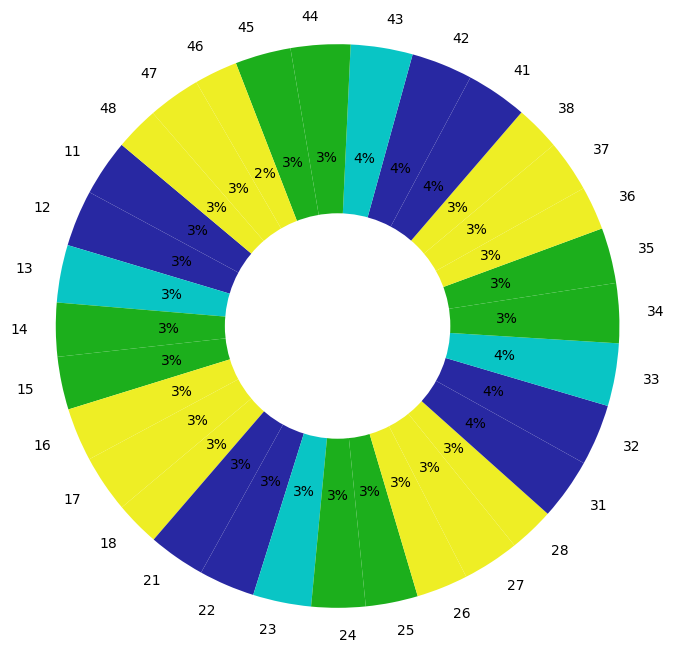

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_labels=['11','12','13','14','15','16','17','18','21','22','23','24','25','26','27','28','31','32','33','34','35','36','37','38','41','42','43','44','45','46','47','48']

plt.figure(figsize=(8, 8))
plt.pie(count, labels=class_labels, autopct='%1.0f%%', startangle=140, colors=['#2828a2','#2828a2','#09c5c5','#1caf1c','#1caf1c','#eeee25','#eeee25','#eeee25'])

center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.show()

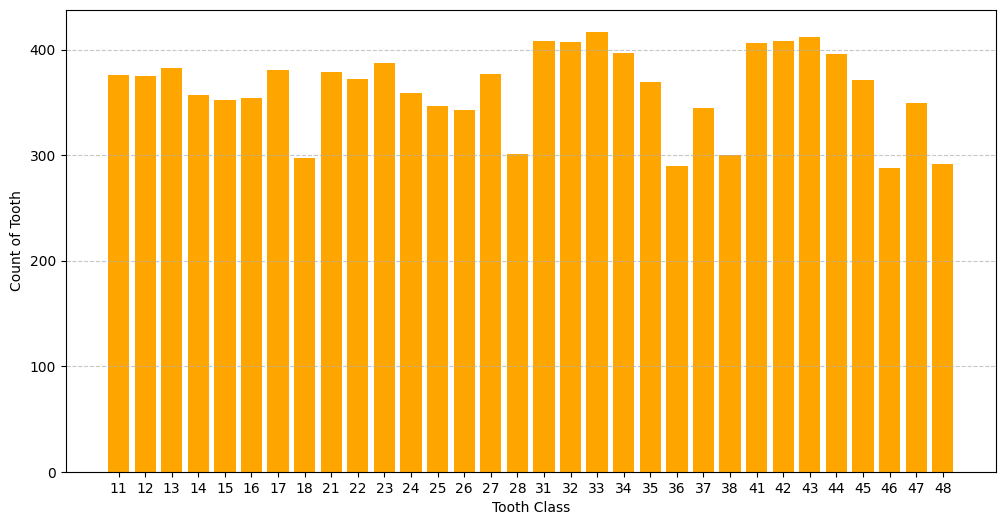

In [17]:
class_labels=['11','12','13','14','15','16','17','18','21','22','23','24','25','26','27','28','31','32','33','34','35','36','37','38','41','42','43','44','45','46','47','48']


plt.figure(figsize=(12, 6))
plt.bar(range(len(count)), count, color='orange')
plt.xlabel('Tooth Class')
plt.ylabel('Count of Tooth')
plt.xticks(range(len(count)),class_labels)  
plt.yticks(range(0, 500, 100))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
teeth_class= [0]*4
teeth_class[0] = count[0]+count[1]+count[8]+count[9]+count[16]+count[17]+count[24]+count[25]
teeth_class[1] = count[2]+count[10]+count[18]+count[26]
teeth_class[2] = count[3]+count[4]+count[11]+count[12]+count[19]+count[20]+count[27]+count[28]
teeth_class[3] = count[5]+count[6]+count[7]+count[13]+count[14]+count[25]+count[21]+count[22]+count[23]+count[29]+count[30]+count[31]

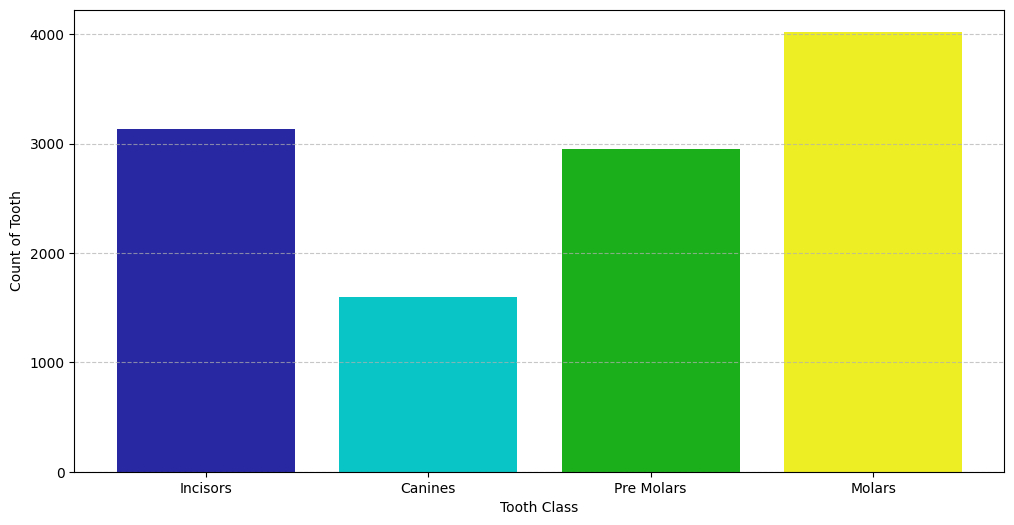

In [19]:
class_labels=['Incisors','Canines','Pre Molars','Molars']


plt.figure(figsize=(12, 6))
plt.bar(range(len(teeth_class)), teeth_class, color=['#2828a2','#09c5c5','#1caf1c','#eeee25'])
plt.xlabel('Tooth Class')
plt.ylabel('Count of Tooth')
plt.xticks(range(len(teeth_class)),class_labels)  # Label x-axis with class indices
plt.yticks(range(0, 5000, 1000))  # Adjust the y-axis ticks to be in hundreds
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()